In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
from eda_utils import plotar_estacoes_mapa

In [2]:
bronze_conn = duckdb.connect("bronze_db")
prata_conn = duckdb.connect("prata_db")

# Descrição das Estações

In [3]:
dim_estacoes = prata_conn.execute("SELECT * FROM dim_estacoes").fetch_df()
print("RESUMO DAS ESTAÇÕES DE CADA INSTITUIÇÃO")
for instituicao in dim_estacoes['nm_instituicao'].unique():
    df = dim_estacoes.loc[dim_estacoes['nm_instituicao']==instituicao]
    print(f"Instituição: {instituicao}")
    print(f"Total de estações: {df['id_estacao'].nunique()}")
    print(f"Tipos de estação:")
    print(f" > Estações Meteorológicas: {df.loc[df['nm_tipo_estacao']=='Meteorológica','id_estacao'].nunique()}")
    print(f" > Estações Indefinidas: {df.loc[df['nm_tipo_estacao']=='Indefinido','id_estacao'].nunique()}")
    print(f"Subtipos de estação:")
    print(f" > Estações Automáticas: {df.loc[df['nm_subtipo_estacao']=='Automática','id_estacao'].nunique()}")
    print(f" > Estações Convencionais: {df.loc[df['nm_subtipo_estacao']=='Convencional','id_estacao'].nunique()}")
    print(f" > Estações Indefinidas: {df.loc[df['nm_subtipo_estacao']=='Indefinido','id_estacao'].nunique()}")
    print()

RESUMO DAS ESTAÇÕES DE CADA INSTITUIÇÃO
Instituição: Instituto Nacional de Meteorologia
Total de estações: 462
Tipos de estação:
 > Estações Meteorológicas: 226
 > Estações Indefinidas: 236
Subtipos de estação:
 > Estações Automáticas: 159
 > Estações Convencionais: 30
 > Estações Indefinidas: 273

Instituição: Agência Nacional de Águas
Total de estações: 13072
Tipos de estação:
 > Estações Meteorológicas: 0
 > Estações Indefinidas: 13072
Subtipos de estação:
 > Estações Automáticas: 0
 > Estações Convencionais: 0
 > Estações Indefinidas: 13072

Instituição: Centro Nacional de Monitoramento e Alertas de Desastres Naturais
Total de estações: 1625
Tipos de estação:
 > Estações Meteorológicas: 0
 > Estações Indefinidas: 1625
Subtipos de estação:
 > Estações Automáticas: 0
 > Estações Convencionais: 0
 > Estações Indefinidas: 1625

Instituição: Centro de Desenvolvimento do Vale do Paranapanema
Total de estações: 5
Tipos de estação:
 > Estações Meteorológicas: 5
 > Estações Indefinidas: 0
S

c:\Users\Mateus Santos Rochas\Desktop\Estudos\07. Doutorado - Matemática aplicada\Pesquisa\Dados Novos\eda_utils.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  brasil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


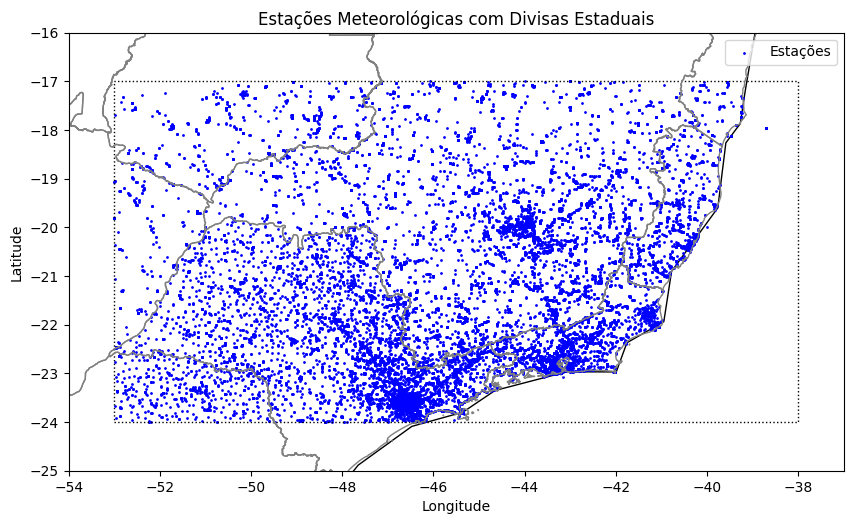

In [4]:
plotar_estacoes_mapa(dim_estacoes,markersize=1,markercolor='blue')
